<a href="https://colab.research.google.com/github/hansuho113/AlgorithmBook/blob/master/Colab_Notebook/TCGA_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drug_res = pd.read_table("/content/drive/MyDrive/SW21Project/TCGA_Drug_Response_07272017.txt")
drug_res

,Cancer Type,bcr_patient_barcode,drug_name,measure_of_response,regimen_indication,days_to_drug_therapy_start,days_to_drug_therapy_end,therapy_types
0,ACC,TCGA-PK-A5HB,Sorafenib,Clinical Progressive Disease,NaN,968.0,1029.0,Targeted Molecular therapy
1,ACC,TCGA-OR-A5K2,Adriamycin,NaN,NaN,118.0,298.0,Chemotherapy
2,ACC,TCGA-OR-A5K2,Cisplatin,NaN,NaN,118.0,298.0,Chemotherapy
3,ACC,TCGA-OR-A5K2,carboplatin,NaN,NaN,118.0,299.0,Chemotherapy
4,ACC,TCGA-OR-A5K2,etoposide,NaN,NaN,118.0,298.0,Chemotherapy
...,...,...,...,...,...,...,...,...
12566,UCS,TCGA-N5-A4RU,Cisplatin,Complete Response,NaN,48.0,113.0,Chemotherapy
12567,UVM,TCGA-V4-A9F3,fotemustine,NaN,NaN,27.0,175.0,Chemotherapy
12568,UVM,TCGA-V4-A9F1,fotemustine,NaN,NaN,22.0,147.0,Chemotherapy
12569,UVM,TCGA-V4-A9ET,fotemustine,NaN,NaN,21.0,174.0,Chemotherapy


In [ ]:
drug_res['Cancer Type'].value_counts()


# TCGA cancer codes
# (https://gdc.cancer.gov/resources-tcga-users/tcga-code-tables/tcga-study-abbreviations)

# COAD(: colon adenocarcinoma)
# 모든 상피 세포에서 기원한 악성 종양은 암종(carcinoma)이라고 부름.
# 암종도 더욱 세분되는데,
# 현미경적으로 선상피(glandular epithelium)의 모양을 가지면 선암종(adenocarcinoma)이라 함.

OV      2516
BRCA    2406
GBM     1505
LGG      695
COAD     593
UCEC     479
STAD     463
LUAD     461
LUSC     357
HNSC     353
BLCA     303
SKCM     265
PAAD     254
READ     231
DLBC     225
SARC     208
CESC     199
TGCT     171
KIRC     168
MESO     159
PRAD     130
UCS       95
ESCA      82
LIHC      66
THCA      56
KIRP      47
KICH      21
ACC       18
THYM      16
CHOL      14
PCPG      11
UVM        4
Name: Cancer Type, dtype: int64

In [ ]:
cancer_type = list(drug_res['Cancer Type'].value_counts().index)
cancer_type_sum = drug_res['Cancer Type'].value_counts().tolist()
type_len = len(cancer_type)
x = np.arange(type_len)

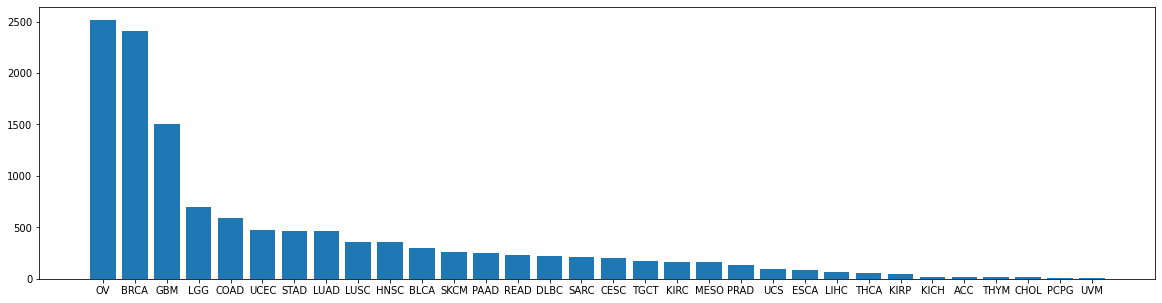

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(x, cancer_type_sum)
plt.xticks(x, cancer_type)
plt.show()

In [ ]:
# COAD drug_res data set
drug_res_c = drug_res[drug_res['Cancer Type'] == "COAD"]

In [ ]:
drug_res_c

,Cancer Type,bcr_patient_barcode,drug_name,measure_of_response,regimen_indication,days_to_drug_therapy_start,days_to_drug_therapy_end,therapy_types
2940,COAD,TCGA-D5-5539,5-FU,NaN,ADJUVANT,38.0,195.0,Chemotherapy
2941,COAD,TCGA-A6-6648,Oxaliplatin,NaN,"OTHER, SPECIFY IN NOTES",63.0,91.0,NaN
2942,COAD,TCGA-A6-6648,Cetuximab Study drug,NaN,"OTHER, SPECIFY IN NOTES",63.0,77.0,NaN
2943,COAD,TCGA-A6-6648,Leucovorin,NaN,"OTHER, SPECIFY IN NOTES",63.0,91.0,NaN
2944,COAD,TCGA-A6-6648,5 FU,NaN,"OTHER, SPECIFY IN NOTES",63.0,93.0,NaN
...,...,...,...,...,...,...,...,...
3528,COAD,TCGA-A6-2674,Leucovorin,NaN,RECURRENCE,761.0,944.0,"Other, specify in notesancillary"
3529,COAD,TCGA-A6-2674,Bevacizumab,NaN,RECURRENCE,761.0,944.0,Targeted Molecular therapy
3530,COAD,TCGA-A6-2674,Oxaliplatin,NaN,RECURRENCE,761.0,944.0,Chemotherapy
3531,COAD,TCGA-A6-2674,Fluorouracil,NaN,RECURRENCE,761.0,946.0,Chemotherapy


In [ ]:
drug_res_c.drug_name.unique()

# 적용 약물명 replace로 통일해야 함
# 5-FU, 5 FU 이런 것들

array(['5-FU', 'Oxaliplatin', 'Cetuximab Study drug', 'Leucovorin',
       '5 FU', 'Folinic acid', '5-Fluorouracil', nan, 'XELODA', '5FU',
       'Fluorouracil', 'oxaliplatin', 'Folinic Acid', 'Cetuximab',
       'Bevacizumab', 'Irinotecan', 'Avastin', 'Xeloda', 'Folfox',
       'Capecitabine', 'capecitabine', 'Floxuridine', 'Dexamethasone',
       'Irinotecan HCl', 'Pegfilgrastim', 'Leucovorin Calcium',
       'IRINOtecan HCl', 'Mitomycin', 'Camptosar',
       'Calcium Foliatum, fluorouracilum, oxaliplatinum, dexamethassone',
       'oxaliplatinum+5 fluorouracilum', '5- FU', 'Raltitrexed',
       'leucovorin', 'fluorouracil', 'Erbitux', 'avastin', 'irinotecan',
       'leucovorin calcium', 'bevacizumab', 'regorafenib',
       'Pegfilgrastim (Peg G-CSF)', 'Filgrastim (G-CSF)',
       'Irinotecan HCL', 'C1 FOLFIRI/Zaltrap', 'Irinotecan + Cetuximab',
       'FOLFIRI/Avastin', 'FOLFOX', '5-Fluorouracil + leucovorin',
       'FolFox', 'Oxaliplatin, Folinic acid, Fluorouracil', 'Panitumumab

In [ ]:
drug_res_c.measure_of_response.unique()

array([nan, 'Complete Response', 'Clinical Progressive Disease',
       'Partial Response', 'Stable Disease'], dtype=object)

In [ ]:
drug_res_c.therapy_types.unique()

array(['Chemotherapy', nan, 'Other, specify in notesAncillary agent',
       'Ancillary', 'Targeted Molecular therapy',
       'Other, specify in notesAncillary', 'Immunotherapy',
       'Other, specify in notesLeucovorin', 'Other, specify in notes',
       'Other, specify in notesPhase III Clinical Trial',
       'Other, specify in notesAncillary Agent',
       'Other, specify in notesProtocol AMG 20060464',
       'Other, specify in notesancillary'], dtype=object)

In [ ]:
patient_list_drug = drug_res_c.bcr_patient_barcode.unique().tolist()
len(patient_list_drug)

154

In [ ]:
suplmt_df = pd.read_excel("/content/drive/MyDrive/SW21Project/TCGA-CDR-SupplementalTableS1.xlsx", index_col=0)
suplmt_df

,bcr_patient_barcode,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,clinical_stage,histological_type,histological_grade,initial_pathologic_dx_year,menopause_status,birth_days_to,vital_status,tumor_status,last_contact_days_to,death_days_to,cause_of_death,new_tumor_event_type,new_tumor_event_site,new_tumor_event_site_other,new_tumor_event_dx_days_to,treatment_outcome_first_course,margin_status,residual_tumor,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
1,TCGA-OR-A5J1,ACC,58.0,MALE,WHITE,Stage II,[Not Applicable],Adrenocortical carcinoma- Usual Type,[Not Available],2000.0,[Not Available],-21496.0,Dead,WITH TUMOR,NaN,1355.0,[Not Available],Distant Metastasis,Peritoneal Surfaces,NaN,754.0,Complete Remission/Response,NaN,NaN,1.0,1355.0,1.0,1355.0,1.0,754.0,1.0,754.0,NaN
2,TCGA-OR-A5J2,ACC,44.0,FEMALE,WHITE,Stage IV,[Not Applicable],Adrenocortical carcinoma- Usual Type,[Not Available],2004.0,[Not Available],-16090.0,Dead,WITH TUMOR,NaN,1677.0,[Not Available],Distant Metastasis,Soft Tissue,NaN,289.0,Progressive Disease,NaN,NaN,1.0,1677.0,1.0,1677.0,NaN,NaN,1.0,289.0,NaN
3,TCGA-OR-A5J3,ACC,23.0,FEMALE,WHITE,Stage III,[Not Applicable],Adrenocortical carcinoma- Usual Type,[Not Available],2008.0,[Not Available],-8624.0,Alive,WITH TUMOR,2091.0,NaN,[Not Available],Distant Metastasis,Lung,NaN,53.0,Complete Remission/Response,NaN,NaN,0.0,2091.0,0.0,2091.0,1.0,53.0,1.0,53.0,NaN
4,TCGA-OR-A5J4,ACC,23.0,FEMALE,WHITE,Stage IV,[Not Applicable],Adrenocortical carcinoma- Usual Type,[Not Available],2000.0,[Not Available],-8451.0,Dead,WITH TUMOR,NaN,423.0,[Not Available],Locoregional Recurrence,Peritoneal Surfaces,NaN,126.0,Progressive Disease,NaN,NaN,1.0,423.0,1.0,423.0,NaN,NaN,1.0,126.0,NaN
5,TCGA-OR-A5J5,ACC,30.0,MALE,WHITE,Stage III,[Not Applicable],Adrenocortical carcinoma- Usual Type,[Not Available],2000.0,[Not Available],-11171.0,Dead,WITH TUMOR,NaN,365.0,[Not Available],Locoregional Recurrence,"Other, specify",vena cava thrombus,50.0,Progressive Disease,NaN,NaN,1.0,365.0,1.0,365.0,NaN,NaN,1.0,50.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,TCGA-YZ-A980,UVM,75.0,MALE,WHITE,Stage IIIA,Stage IIIA,Spindle Cell|Epithelioid Cell,[Not Available],2010.0,[Not Available],-27716.0,Alive,TUMOR FREE,1862.0,NaN,[Not Available],New Primary Tumor,"Other, specify",Scalp,1556.0,[Not Available],NaN,NaN,0.0,1862.0,0.0,1862.0,NaN,NaN,1.0,1556.0,NaN
11157,TCGA-YZ-A982,UVM,79.0,FEMALE,WHITE,Stage IIIB,Stage IIIB,Spindle Cell,[Not Available],2013.0,[Not Available],-28938.0,Alive,TUMOR FREE,495.0,NaN,[Not Available],NaN,NaN,NaN,NaN,[Not Available],NaN,NaN,0.0,495.0,0.0,495.0,NaN,NaN,0.0,495.0,NaN
11158,TCGA-YZ-A983,UVM,51.0,FEMALE,WHITE,Stage IIB,Stage IIB,Epithelioid Cell,[Not Available],2013.0,[Not Available],-18769.0,Alive,TUMOR FREE,798.0,NaN,[Not Available],NaN,NaN,NaN,NaN,[Not Available],NaN,NaN,0.0,798.0,0.0,798.0,NaN,NaN,0.0,798.0,NaN
11159,TCGA-YZ-A984,UVM,50.0,FEMALE,WHITE,Stage IIB,Stage IIIA,Spindle Cell|Epithelioid Cell,[Not Available],2011.0,[Not Available],-18342.0,Dead,WITH TUMOR,NaN,1396.0,Metastatic Uveal Melanoma,New Primary Tumor,"Other, specify",Thyroid,154.0,[Not Available],NaN,NaN,1.0,1396.0,1.0,1396.0,NaN,NaN,1.0,154.0,NaN


In [ ]:
suplmt_coad = suplmt_df[suplmt_df['type'] == 'COAD']
suplmt_coad

,bcr_patient_barcode,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,clinical_stage,histological_type,histological_grade,initial_pathologic_dx_year,menopause_status,birth_days_to,vital_status,tumor_status,last_contact_days_to,death_days_to,cause_of_death,new_tumor_event_type,new_tumor_event_site,new_tumor_event_site_other,new_tumor_event_dx_days_to,treatment_outcome_first_course,margin_status,residual_tumor,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
1954,TCGA-3L-AA1B,COAD,61.0,FEMALE,BLACK OR AFRICAN AMERICAN,Stage I,[Not Applicable],Colon Adenocarcinoma,[Not Available],2013.0,[Not Available],-22379.0,Alive,TUMOR FREE,475.0,NaN,[Not Available],NaN,NaN,NaN,NaN,Complete Remission/Response,NaN,NaN,0.0,475.0,0.0,475.0,0.0,475.0,0.0,475.0,NaN
1955,TCGA-4N-A93T,COAD,67.0,MALE,BLACK OR AFRICAN AMERICAN,Stage IIIB,[Not Applicable],Colon Adenocarcinoma,[Not Available],2013.0,[Not Available],-24523.0,Alive,WITH TUMOR,146.0,NaN,[Not Available],NaN,NaN,NaN,NaN,Stable Disease,NaN,NaN,0.0,146.0,0.0,146.0,NaN,NaN,0.0,146.0,NaN
1956,TCGA-4T-AA8H,COAD,42.0,FEMALE,BLACK OR AFRICAN AMERICAN,Stage IIA,[Not Applicable],Colon Mucinous Adenocarcinoma,[Not Available],2013.0,[Not Available],-15494.0,Alive,TUMOR FREE,385.0,NaN,[Not Available],NaN,NaN,NaN,NaN,Complete Remission/Response,NaN,NaN,0.0,385.0,0.0,385.0,0.0,385.0,0.0,385.0,NaN
1957,TCGA-5M-AAT4,COAD,74.0,MALE,BLACK OR AFRICAN AMERICAN,Stage IV,[Not Applicable],Colon Adenocarcinoma,[Not Available],2009.0,[Not Available],-27095.0,Dead,WITH TUMOR,NaN,49.0,[Not Available],NaN,NaN,NaN,NaN,Progressive Disease,NaN,NaN,1.0,49.0,1.0,49.0,NaN,NaN,1.0,49.0,NaN
1958,TCGA-5M-AAT6,COAD,40.0,FEMALE,BLACK OR AFRICAN AMERICAN,Stage IV,[Not Applicable],Colon Adenocarcinoma,[Not Available],2009.0,[Not Available],-14852.0,Dead,WITH TUMOR,NaN,290.0,[Not Available],NaN,NaN,NaN,219.0,Progressive Disease,NaN,NaN,1.0,290.0,1.0,290.0,NaN,NaN,1.0,219.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,TCGA-QL-A97D,COAD,84.0,FEMALE,BLACK OR AFRICAN AMERICAN,Stage I,[Not Applicable],Colon Adenocarcinoma,[Not Available],2012.0,[Not Available],-30914.0,Alive,TUMOR FREE,666.0,NaN,[Not Available],NaN,NaN,NaN,NaN,Complete Remission/Response,NaN,NaN,0.0,666.0,0.0,666.0,0.0,666.0,0.0,666.0,NaN
2409,TCGA-RU-A8FL,COAD,51.0,MALE,BLACK OR AFRICAN AMERICAN,Stage IIIB,[Not Applicable],Colon Adenocarcinoma,[Not Available],2011.0,[Not Available],-18975.0,Alive,WITH TUMOR,1177.0,NaN,[Not Available],Metastatic,NaN,NaN,256.0,Partial Remission/Response,NaN,NaN,0.0,1177.0,0.0,1177.0,NaN,NaN,1.0,256.0,NaN
2410,TCGA-SS-A7HO,COAD,44.0,FEMALE,BLACK OR AFRICAN AMERICAN,Stage IIB,[Not Applicable],Colon Adenocarcinoma,[Not Available],2010.0,[Not Available],-16416.0,Alive,WITH TUMOR,1829.0,NaN,[Not Available],Locoregional Disease,NaN,NaN,506.0,Complete Remission/Response,NaN,NaN,0.0,1829.0,0.0,1829.0,1.0,506.0,1.0,506.0,NaN
2411,TCGA-T9-A92H,COAD,82.0,MALE,BLACK OR AFRICAN AMERICAN,Stage IIA,[Not Applicable],Colon Adenocarcinoma,[Not Available],2013.0,[Not Available],-30058.0,Alive,WITH TUMOR,362.0,NaN,[Not Available],NaN,NaN,NaN,81.0,Complete Remission/Response,NaN,NaN,0.0,362.0,0.0,362.0,1.0,81.0,1.0,81.0,NaN


In [ ]:
patient_list_suplmt = suplmt_coad.bcr_patient_barcode.unique().tolist()


In [ ]:
len(patient_list_drug), len(patient_list_suplmt)

(154, 459)

supplement table은 환자의 개인신상정보를 담고 있는 것 같은데 459명이고, 앞서 나온 drug-response의 환자는 총 154명으로 전체 환자의 약물반응성을 측정한 것은 아닌 것 같음

In [ ]:
gene_exp = pd.read_csv("/content/drive/MyDrive/SW21Project/EBPlusPlusAdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp.tsv", sep='\t')
gene_exp

,gene_id,TCGA-OR-A5J1-01A-11R-A29S-07,TCGA-OR-A5J2-01A-11R-A29S-07,TCGA-OR-A5J3-01A-11R-A29S-07,TCGA-OR-A5J5-01A-11R-A29S-07,TCGA-OR-A5J6-01A-31R-A29S-07,TCGA-OR-A5J7-01A-11R-A29S-07,TCGA-OR-A5J8-01A-11R-A29S-07,TCGA-OR-A5J9-01A-11R-A29S-07,TCGA-OR-A5JA-01A-11R-A29S-07,TCGA-OR-A5JB-01A-11R-A29S-07,TCGA-OR-A5JC-01A-11R-A29S-07,TCGA-OR-A5JD-01A-11R-A29S-07,TCGA-OR-A5JE-01A-11R-A29S-07,TCGA-OR-A5JF-01A-11R-A29S-07,TCGA-OR-A5JG-01A-11R-A29S-07,TCGA-OR-A5JI-01A-11R-A29S-07,TCGA-OR-A5JJ-01A-11R-A29S-07,TCGA-OR-A5JK-01A-11R-A29S-07,TCGA-OR-A5JL-01A-11R-A29S-07,TCGA-OR-A5JM-01A-11R-A29S-07,TCGA-OR-A5JO-01A-11R-A29S-07,TCGA-OR-A5JP-01A-11R-A29S-07,TCGA-OR-A5JQ-01A-11R-A29S-07,TCGA-OR-A5JR-01A-11R-A29S-07,TCGA-OR-A5JS-01A-11R-A29S-07,TCGA-OR-A5JT-01A-11R-A29S-07,TCGA-OR-A5JV-01A-11R-A29S-07,TCGA-OR-A5JW-01A-11R-A29S-07,TCGA-OR-A5JX-01A-11R-A29S-07,TCGA-OR-A5JY-01A-31R-A29S-07,TCGA-OR-A5JZ-01A-11R-A29S-07,TCGA-OR-A5K0-01A-11R-A29S-07,TCGA-OR-A5K1-01A-11R-A29S-07,TCGA-OR-A5K2-01A-11R-A29S-07,TCGA-OR-A5K3-01A-11R-A29S-07,TCGA-OR-A5K4-01A-11R-A29S-07,TCGA-OR-A5K5-01A-11R-A29S-07,TCGA-OR-A5K6-01A-11R-A29S-07,TCGA-OR-A5K8-01A-11R-A29S-07,...,TCGA-AB-3011-03A-01T-0736-13,TCGA-AB-3012-03A-01T-0736-13,TCGA-BR-4191-01A-02R-1131-13,TCGA-BR-4201-01A-01R-1131-13,TCGA-BR-4253-01A-01R-1131-13,TCGA-BR-4255-01A-01R-1131-13,TCGA-BR-4256-01A-01R-1131-13,TCGA-BR-4267-01A-01R-1131-13,TCGA-BR-4279-01A-01R-1131-13,TCGA-BR-4294-01A-01R-1131-13,TCGA-BR-4357-01A-01R-1157-13,TCGA-BR-4361-01A-01R-1157-13,TCGA-BR-4362-01A-01R-1157-13,TCGA-BR-4363-01A-01R-1157-13,TCGA-BR-4366-01A-01R-1157-13,TCGA-BR-4367-01A-01R-1157-13,TCGA-BR-4368-01A-01R-1157-13,TCGA-BR-4369-01A-01R-1157-13,TCGA-BR-4370-01A-01R-1157-13,TCGA-BR-4371-01A-01R-1157-13,TCGA-CG-4301-01A-01R-1157-13,TCGA-CG-4304-01A-01R-1157-13,TCGA-CG-4305-01A-01R-1157-13,TCGA-CG-4306-01A-01R-1157-13,TCGA-CG-4436-01A-01R-1157-13,TCGA-CG-4438-01A-01R-1157-13,TCGA-CG-4440-01A-01R-1157-13,TCGA-CG-4442-01A-01R-1157-13,TCGA-CG-4443-01A-01R-1157-13,TCGA-CG-4444-01A-01R-1157-13,TCGA-CG-4449-01A-01R-1157-13,TCGA-CG-4462-01A-01R-1157-13,TCGA-CG-4465-01A-01R-1157-13,TCGA-CG-4466-01A-01R-1157-13,TCGA-CG-4469-01A-01R-1157-13,TCGA-CG-4472-01A-01R-1157-13,TCGA-CG-4474-01A-02R-1157-13,TCGA-CG-4475-01A-01R-1157-13,TCGA-CG-4476-01A-01R-1157-13,TCGA-CG-4477-01A-01R-1157-13
0,?|100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3861,0.0000,0.0000,0.0000,1.5256,0.0000,0.0000,0.0000,0.4392,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8637,1.2937,0.0000,0.0000,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,?|100133144,3.2661,2.6815,1.7301,0.0000,0.0000,1.1673,1.4422,0.0000,4.4556,7.1293,2.6463,4.3811,0.0000,2.7763,0.0000,1.4709,1.1914,7.8032,7.7097,2.5862,3.5634,0.0000,0.7485,3.1549,1.3873,7.7887,3.6241,4.3835,4.9359,0.0000,4.8564,1.8235,0.8281,1.2870,4.3467,3.8827,13.0179,0.0000,0.0000,...,17.716369,13.389132,14.071057,11.329452,3.723643,0.152714,0.766700,7.700615,0.572036,29.644535,9.686832,31.496379,18.108204,15.339604,7.821240,4.951610,26.780123,23.150730,14.112944,23.614495,16.465764,4.507328,24.503813,12.814032,6.796057,17.552167,8.944041,13.948436,10.855999,8.078055,4.358154,5.676995,5.219350,14.846708,20.115492,6.997533,18.311906,12.057112,18.628740,17.874417
2,?|100134869,3.9385,8.9948,6.5650,1.5492,4.4709,6.0529,2.2876,1.3599,5.0581,0.0000,6.2595,4.1141,2.8281,4.5603,5.9116,5.0046,3.7171,1.3501,4.0357,0.0000,1.8357,9.2227,1.2422,1.5399,6.0118,9.2668,2.0872,8.3414,11.2794,2.6870,5.2191,2.9334,0.8281,3.0317,9.8836,4.5214,7.6527,7.0671,7.2569,...,8.711105,6.345575,10.396725,4.624286,5.023468,3.777147,4.109257,8.784211,0.216067,5.791117,7.940472,4.980171,6.212606,7.841276,5.536552,6.141207,4.013048,10.749562,10.540668,11.177682,4.501637,2.945732,5.272467,3.459179,0.556227,6.962577,1.460478,8.518132,4.211036,1.903348,2.6

In [ ]:
clinical_df = pd.read_excel("/content/drive/MyDrive/SW21Project/clinical_PANCAN_patient_with_followup.xlsx")
clinical_df

,bcr_patient_uuid,bcr_patient_barcode,acronym,gender,vital_status,days_to_birth,days_to_death,days_to_last_followup,days_to_initial_pathologic_diagnosis,age_at_initial_pathologic_diagnosis,icd_10,tissue_retrospective_collection_indicator,icd_o_3_histology,tissue_prospective_collection_indicator,history_of_neoadjuvant_treatment,icd_o_3_site,tumor_tissue_site,new_tumor_event_after_initial_treatment,radiation_therapy,race,project_code,prior_dx,disease_code,ethnicity,informed_consent_verified,person_neoplasm_cancer_status,patient_id,year_of_initial_pathologic_diagnosis,histological_type,tissue_source_site,form_completion_date,pathologic_T,pathologic_M,clinical_M,pathologic_N,system_version,pathologic_stage,stage_other,clinical_stage,clinical_T,...,extranodal_involvment_site_other,ldh_lab_value,hiv_positive_status,ldh_level,ldh_norm_range_upper,abnormality_tested_results.1,abnormality_tested_results,genetic_abnormality_method,bone_marrow_sample_histology,albumin_result_upper_limit,vascular_tumor_cell_type,albumin_result_lower_limit,albumin_result_specified_value,platelet_result_upper_limit,intern_norm_ratio_upper_limit,cholangitis_tissue_evidence,relative_family_cancer_history,platelet_result_lower_limit,hist_hepato_carcinoma_risk,hist_hepato_carc_fact,cancer_first_degree_relative,creatinine_lower_level,prothrombin_time_result_value,ca_19_9_level_upper,ca_19_9_level_lower,ca_19_9_level,creatinine_upper_limit,surgical_procedure_name,creatinine_value_in_mg_dl,bilirubin_lower_limit,total_bilirubin_upper_limit,platelet_result_count,fibrosis_ishak_score,fetoprotein_outcome_value,fetoprotein_outcome_upper_limit,fetoprotein_outcome_lower_limit,inter_norm_ratio_lower_limit,family_cancer_type_txt,bilirubin_upper_limit,days_to_last_known_alive
0,B3164F7B-C826-4E08-9EE6-8FF96D29B913,TCGA-OR-A5J1,ACC,MALE,Dead,-21496,1355,[Not Available],0,58,C74.0,YES,8370-01-01 00:00:00,NO,No,C74.0,Adrenal,YES,NO,WHITE,[Not Available],No,[Not Available],[Not Evaluated],YES,WITH TUMOR,A5J1,2000,Adrenocortical carcinoma- Usual Type,OR,2014-04-02 00:00:00,T2,[Not Applicable],M0,N0,[Not Applicable],Stage II,[Not Available],[Not Applicable],[Not Applicable],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8E7C2E31-D085-4B75-A970-162526DD07A0,TCGA-OR-A5J2,ACC,FEMALE,Dead,-16090,1677,[Not Available],0,44,C74.0,YES,8370-03-01 00:00:00,NO,No,C74.0,Adrenal,YES,NO,WHITE,[Not Available],No,[Not Available],HISPANIC OR LATINO,YES,WITH TUMOR,A5J2,2004,Adrenocortical carcinoma- Usual Type,OR,2013-12-03 00:00:00,T3,[Not Applicable],M1,N0,[Not Applicable],Stage IV,[Not Available],[Not Applicable],[Not Applicable],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DFD687BC-6E69-42F7-AF94-D17FC150D1A1,TCGA-OR-A5J3,ACC,FEMALE,Alive,-8624,[Not Applicable],2091,0,23,C74.0,YES,8370-03-01 00:00:00,NO,No,C74.0,Adrenal,YES,NO,WHITE,[Not Available],No,[Not Available],HISPANIC OR LATINO,YES,WITH TUMOR,A5J3,2008,Adrenocortical carcinoma- Usual Type,OR,2013-12-02 00:00:00,T3,[Not Applicable],M0,N0,[Not Applicable],Stage III,[Not Available],[Not Applicable],[Not Applicable],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5F3E2974-F1DF-47A2-8A8A-29BB525EEEF6,TCGA-OR-A5J4,ACC,FEMALE,Dead,-8451,423,[Not Available],0,23,C74.0,YES,8370-03-01 00:00:00,NO,No,C74.0,Adrenal,YES,NO,WHITE,[Not Available],No,[Not Available],HISPANIC OR LATINO,YES,WITH TUMOR,A5J4,2000,Adrenocortical carcinoma- Usual Type,OR,2013-12-02 00:00:00,T3,[Not Applicable],M1,N1,[Not Applicable],Stage IV,[Not Available],[Not Applicable],[Not Applicable],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
clinical_coad = clinical_df[clinical_df['acronym'] == 'COAD']
clinical_coad

,bcr_patient_uuid,bcr_patient_barcode,acronym,gender,vital_status,days_to_birth,days_to_death,days_to_last_followup,days_to_initial_pathologic_diagnosis,age_at_initial_pathologic_diagnosis,icd_10,tissue_retrospective_collection_indicator,icd_o_3_histology,tissue_prospective_collection_indicator,history_of_neoadjuvant_treatment,icd_o_3_site,tumor_tissue_site,new_tumor_event_after_initial_treatment,radiation_therapy,race,project_code,prior_dx,disease_code,ethnicity,informed_consent_verified,person_neoplasm_cancer_status,patient_id,year_of_initial_pathologic_diagnosis,histological_type,tissue_source_site,form_completion_date,pathologic_T,pathologic_M,clinical_M,pathologic_N,system_version,pathologic_stage,stage_other,clinical_stage,clinical_T,...,extranodal_involvment_site_other,ldh_lab_value,hiv_positive_status,ldh_level,ldh_norm_range_upper,abnormality_tested_results.1,abnormality_tested_results,genetic_abnormality_method,bone_marrow_sample_histology,albumin_result_upper_limit,vascular_tumor_cell_type,albumin_result_lower_limit,albumin_result_specified_value,platelet_result_upper_limit,intern_norm_ratio_upper_limit,cholangitis_tissue_evidence,relative_family_cancer_history,platelet_result_lower_limit,hist_hepato_carcinoma_risk,hist_hepato_carc_fact,cancer_first_degree_relative,creatinine_lower_level,prothrombin_time_result_value,ca_19_9_level_upper,ca_19_9_level_lower,ca_19_9_level,creatinine_upper_limit,surgical_procedure_name,creatinine_value_in_mg_dl,bilirubin_lower_limit,total_bilirubin_upper_limit,platelet_result_count,fibrosis_ishak_score,fetoprotein_outcome_value,fetoprotein_outcome_upper_limit,fetoprotein_outcome_lower_limit,inter_norm_ratio_lower_limit,family_cancer_type_txt,bilirubin_upper_limit,days_to_last_known_alive
1947,A94E1279-A975-480A-93E9-7B1FF05CBCBF,TCGA-3L-AA1B,COAD,FEMALE,Alive,-22379,[Not Applicable],475,0,61,C18.0,NO,8140-03-01 00:00:00,YES,No,C18.0,Colon,NO,NO,BLACK OR AFRICAN AMERICAN,[Not Available],No,[Not Available],NOT HISPANIC OR LATINO,YES,TUMOR FREE,AA1B,2013,Colon Adenocarcinoma,3L,2014-04-22 00:00:00,T2,M0,[Not Applicable],N0,7th,Stage I,[Not Available],[Not Applicable],[Not Applicable],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948,92554413-9EBC-4354-8E1B-9682F3A031D9,TCGA-4N-A93T,COAD,MALE,Alive,-24523,[Not Applicable],146,0,67,C18.2,NO,8140-03-01 00:00:00,YES,No,C18.2,Colon,NO,NO,BLACK OR AFRICAN AMERICAN,[Not Available],No,[Not Available],NOT HISPANIC OR LATINO,YES,WITH TUMOR,A93T,2013,Colon Adenocarcinoma,4N,2014-10-01 00:00:00,T4a,M0,[Not Applicable],N1b,7th,Stage IIIB,[Not Available],[Not Applicable],[Not Applicable],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949,A5E14ADD-1552-4606-9FFE-3A03BCF76640,TCGA-4T-AA8H,COAD,FEMALE,Alive,-15494,[Not Applicable],385,0,42,C18.6,YES,8480-03-01 00:00:00,NO,No,C18.6,Colon,NO,NO,BLACK OR AFRICAN AMERICAN,[Not Available],No,[Not Available],NOT HISPANIC OR LATINO,YES,TUMOR FREE,AA8H,2013,Colon Mucinous Adenocarcinoma,4T,2014-06-05 00:00:00,T3,MX,[Not Applicable],N0,7th,Stage IIA,[Not Available],[Not Applicable],[Not Applicable],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950,1136DD50-242A-4659-AAD4-C53F9E759BB3,TCGA-5M-AAT4,COAD,MALE,Dead,-27095,49,[Not Available],0,74,C18.2,YES,8140-03-01 00:00:00,NO,No,C18.2,Colon,NO,NO,BLACK OR AFRICAN AMERICAN,[Not Available],No,[Not Available],HISPANIC OR LATINO,YES,WITH TUMOR,AAT4,2009,Colon Adenocarcinoma,5M,2015-01-27 00:00:00,T3,M1b,[Not Applicable],N0,6th,Stage IV,[Not Available],[Not Applicable],[Not Applicable],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na